# Mini-Project

## Table of Content

* [Setup](#setup)
* Supervised Learning
    * [Naive Bayes](#naive-bayes)
    * [SVM](#svm)
    * [Decision Tree](#decision-tree)
    * [KNN](#knn)
    * [Random Forest](#random-forest)
    * [Adaboost](#adaboost)

<a id = 'setup'></a>
# Setup

In [1]:
%run "~/github/udacity-dand/machine-learning/ud120-projects/tools/startup.py"


checking for nltk
checking for numpy
checking for scipy
checking for sklearn

downloading the Enron dataset (this may take a while)
to check on progress, you can cd up one level, then execute <ls -lthr>
Enron dataset should be last item on the list, along with its current size
download will complete at about 423 MB
download complete!

unzipping Enron dataset (this may take a while)
you're ready to go!


<a id = 'naive-bayes'></a>
# Naive Bayes

In [6]:
# %load nb_author_id.py
#!/usr/bin/python

"""
    This is the code to accompany the Lesson 1 (Naive Bayes) mini-project.

    Use a Naive Bayes Classifier to identify emails by their authors

    authors and labels:
    Sara has label 0
    Chris has label 1
"""

import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()




#########################################################
### your code goes here ###

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf = GaussianNB()

t0 = time()
clf.fit(features_train, labels_train)
print 'training time: ', round(time() - t0, 3), 's'

t1 = time()
pred = clf.predict(features_test)
print 'predict time:', round(time() - t1, 3), 's'

t2 = time()
pred_accuracy1 = accuracy_score(pred, labels_test)
print 'check time 1: ', round(time() - t2, 3), 's'

t3 = time()
pred_accuracy2 = clf.score(features_test, labels_test)
print 'check time 2: ', round(time() - t3, 3), 's'

print(pred_accuracy1)
print(pred_accuracy2)
#########################################################


 no. of Chris training emails: 7936
no. of Sara training emails: 7884
training time:  1.718 s
predict time: 0.247 s
check time 1:  0.001 s
check time 2:  0.147 s
0.973265073948
0.973265073948


`sklearn.metrics.accuracy_score()` is much faster than `clf.scores()`!

<a id = 'svm'></a>
# SVM

In [3]:
# %load svm_author_id.py
#!/usr/bin/python

"""
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:
    Sara has label 0
    Chris has label 1
"""

import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()




#########################################################
### your code goes here ###
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')

t0 = time()
clf.fit(features_train, labels_train)
print 'the fitting takes: ', round(time() - t0), 's'

t1 = time()
pre = clf.predict(features_test)
print 'the predict: ', round(time() - t1), 's'

acc = accuracy_score(pre, labels_test)
print acc

#########################################################


no. of Chris training emails: 7936
no. of Sara training emails: 7884
the fitting takes:  211.0 s
the predict:  21.0 s
0.984072810011


A very good rate, but also very slow. Let's try some another way to speed it up.

In [6]:
# %load svm_author_id.py
#!/usr/bin/python

"""
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:
    Sara has label 0
    Chris has label 1
"""

import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()




#########################################################
### your code goes here ###
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# use 1% of data

features_train = features_train[:len(features_train)/100]
labels_train = labels_train[:len(labels_train)/100]

clf = SVC(kernel='linear')

t0 = time()
clf.fit(features_train, labels_train)
print 'the fitting takes: ', round(time() - t0), 's'

t1 = time()
pre = clf.predict(features_test)
print 'the predict: ', round(time() - t1), 's'

acc = accuracy_score(pre, labels_test)
print acc


#########################################################


no. of Chris training emails: 7936
no. of Sara training emails: 7884
the fitting takes:  0.0 s
the predict:  1.0 s
0.884527872582


There is a tradeoff between speed and accuracy. Let's try another kind of SVM.

In [8]:
# %load svm_author_id.py
#!/usr/bin/python

"""
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:
    Sara has label 0
    Chris has label 1
"""

import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()




#########################################################
### your code goes here ###
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

features_train = features_train[:len(features_train)/100]
labels_train = labels_train[:len(labels_train)/100]

clf = SVC(kernel='rbf')

t0 = time()
clf.fit(features_train, labels_train)
print 'the fitting takes: ', round(time() - t0), 's'

t1 = time()
pre = clf.predict(features_test)
print 'the predict: ', round(time() - t1), 's'

acc = accuracy_score(pre, labels_test)
print acc


#########################################################


no. of Chris training emails: 7936
no. of Sara training emails: 7884
the fitting takes:  0.0 s
the predict:  1.0 s
0.616040955631


This is not a very good accuracy rate. Let's play around with the parameters.

In [14]:
# %load svm_author_id.py
#!/usr/bin/python

"""
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:
    Sara has label 0
    Chris has label 1
"""

import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()




#########################################################
### your code goes here ###
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='rbf', C = 10000)

t0 = time()
clf.fit(features_train, labels_train)
print 'the fitting takes: ', round(time() - t0), 's'

t1 = time()
pre = clf.predict(features_test)
print 'the predict: ', round(time() - t1), 's'

acc = accuracy_score(pre, labels_test)
print acc


#########################################################


no. of Chris training emails: 7936
no. of Sara training emails: 7884
the fitting takes:  134.0 s
the predict:  14.0 s
0.990898748578


Under 1% testing data:

|C|Accuracy|Time|
|---|---|---|
|10|0.616040955631|0s|
|100|0.616040955631|0s|
|1000|0.821387940842|0s|
|100000|0.892491467577|0s|

In [17]:
clf.predict(features_test[[10, 26, 50]])

array([1, 0, 1])

In [19]:
len(pre == 1)

1758

In [22]:
(pre == 1).sum()

877

<a id = 'decision-tree'></a>
# Decision Tree

In [25]:
# %load dt_author_id.py
#!/usr/bin/python

"""
    This is the code to accompany the Lesson 3 (decision tree) mini-project.

    Use a Decision Tree to identify emails from the Enron corpus by author:
    Sara has label 0
    Chris has label 1
"""

import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()


#########################################################
### your code goes here ###

from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(min_samples_split=40)

t0 = time()
clf.fit(features_train, labels_train)
print "the fitting takes: ", round(time() - t0), 's'

t1 = time()
pre = clf.predict(features_test)
print "the test takes: ", round(time() - t1), 's'

accuracy_score(pre, labels_test)

#########################################################


no. of Chris training emails: 7936
no. of Sara training emails: 7884
the fitting takes:  85.0 s
the test takes:  0.0 s


0.97724687144482369

In [35]:
features_train.shape

(15820, 3785)

Change the percentile in email.preprocess.py from 10 to 1 to adjust the features.

In [39]:
# %load dt_author_id.py
#!/usr/bin/python

"""
    This is the code to accompany the Lesson 3 (decision tree) mini-project.

    Use a Decision Tree to identify emails from the Enron corpus by author:
    Sara has label 0
    Chris has label 1
"""

import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()


#########################################################
### your code goes here ###

from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(min_samples_split=40)

t0 = time()
clf.fit(features_train, labels_train)
print "the fitting takes: ", round(time() - t0), 's'

t1 = time()
pre = clf.predict(features_test)
print "the test takes: ", round(time() - t1), 's'

accuracy_score(pre, labels_test)

#########################################################


no. of Chris training emails: 7936
no. of Sara training emails: 7884
the fitting takes:  65.0 s
the test takes:  0.0 s


0.97781569965870307

In [41]:
features_train.shape

(15820, 3785)

In [44]:
from email_preprocess import preprocess
features_train, features_test, labels_train, labels_test = preprocess()

no. of Chris training emails: 7936
no. of Sara training emails: 7884


In [45]:
features_train.shape

(15820, 3785)

In [48]:
%run /Users/guanrongfu/ml-practice/tools/email_preprocess.py
features_train, features_test, labels_train, labels_test = preprocess()
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(min_samples_split=40)

t0 = time()
clf.fit(features_train, labels_train)
print "the fitting takes: ", round(time() - t0), 's'

t1 = time()
pre = clf.predict(features_test)
print "the test takes: ", round(time() - t1), 's'

accuracy_score(pre, labels_test)

no. of Chris training emails: 7936
no. of Sara training emails: 7884
the fitting takes:  4.0 s
the test takes:  0.0 s


0.9670079635949943

<a id = 'knn'></a>
# K Nearest Neighbors (KNN)

In [55]:
# %load knn_author_id.py
#!/usr/bin/python

"""
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:
    Sara has label 0
    Chris has label 1
"""

import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()




#########################################################
### your code goes here ###
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier()

t0 = time()
neigh.fit(features_train, labels_train)
print 'the fitting takes: ', round(time() - t0), 's'

t1 = time()
pre = neigh.predict(features_test)
print 'the predict: ', round(time() - t1), 's'

acc = accuracy_score(pre, labels_test)
print acc


#########################################################


no. of Chris training emails: 7936
no. of Sara training emails: 7884
the fitting takes:  5.0 s
the predict:  167.0 s
0.857224118316


KNN has a function that the previous three models doesn't. It is the predict_proba() function. It is designed to deal with multi-class predictions. It will return probability estimates for the test data X.

In [58]:
neigh.predict_proba(features_test)

array([[ 1. ,  0. ],
       [ 0.6,  0.4],
       [ 0. ,  1. ],
       ..., 
       [ 0. ,  1. ],
       [ 0.6,  0.4],
       [ 0.6,  0.4]])

<a id = 'random-forest'></a>
# Random Forest

In [64]:
# %load rf_author_id.py
#!/usr/bin/python

"""
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:
    Sara has label 0
    Chris has label 1
"""

import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()




#########################################################
### your code goes here ###
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier()

t0 = time()
clf.fit(features_train, labels_train)
print 'the fitting takes: ', round(time() - t0), 's'

t1 = time()
pre = clf.predict(features_test)
print 'the predict: ', round(time() - t1), 's'

acc = accuracy_score(pre, labels_test)
print acc


#########################################################


no. of Chris training emails: 7936
no. of Sara training emails: 7884
the fitting takes:  6.0 s
the predict:  0.0 s
0.993174061433


<a id = 'adaboost'></a>
# Adaboost

In [70]:
# %load adaboost_author_id.py
#!/usr/bin/python

"""
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:
    Sara has label 0
    Chris has label 1
"""

import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()




#########################################################
### your code goes here ###
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

clf = AdaBoostClassifier()

t0 = time()
clf.fit(features_train, labels_train)
print 'the fitting takes: ', round(time() - t0), 's'

t1 = time()
pre = clf.predict(features_test)
print 'the predict: ', round(time() - t1), 's'

acc = accuracy_score(pre, labels_test)
print acc


#########################################################


no. of Chris training emails: 7936
no. of Sara training emails: 7884
the fitting takes:  94.0 s
the predict:  0.0 s
0.950511945392


# Explore Enron Dataset

Read the Enron Email Dataset

In [74]:
# %load explore_enron_data.py
#!/usr/bin/python

""" 
    Starter code for exploring the Enron dataset (emails + finances);
    loads up the dataset (pickled dict of dicts).

    The dataset has the form:
    enron_data["LASTNAME FIRSTNAME MIDDLEINITIAL"] = { features_dict }

    {features_dict} is a dictionary of features associated with that person.
    You should explore features_dict as part of the mini-project,
    but here's an example to get you started:

    enron_data["SKILLING JEFFREY K"]["bonus"] = 5600000
    
"""

import pickle

enron_data = pickle.load(open("../final_project/final_project_dataset.pkl", "r"))

Check how many people are in the dataset.

In [76]:
len(enron_data)

146

Check how many features for each person.

In [80]:
for key in enron_data:
    print len(enron_data[key])
    break

21


How many people in the dataset actually has person of interest.

In [102]:
count = 0
for key in enron_data:
    if enron_data[key]['poi']:
        count += 1
print count

18


There is a text file containing all the POI names. Check how many people are in it.

In [101]:
with open('poi_names.txt', 'r') as f:
    f.readline()
    names = f.read()
    names = names.split('\n')
    names = names[1:len(names)-1]
    
len(names)

35

The name within the dataset following certain format: 'LAST NAME FIRST NAME' or 
'LAST NAME FIRST NAME MIDDLE INITIAL'. I am going to check the information for some people. I will write a function to transfer the name to the format I want.

In [142]:
def update_name(name):
    new_name = name.upper()
    new_name = new_name.split(' ')
    
    if len(new_name) == 2:
        new_name = list(reversed(new_name))
        new_name = ' '.join(new_name)
    elif len(new_name) == 3:
        new_order = [2, 0, 1]
        new_name = [new_name[i] for i in new_order]
        new_name = ' '.join(new_name)
    return new_name

In [140]:
name = update_name('Wesley Colwell')
enron_data[name]

{'bonus': 1200000,
 'deferral_payments': 27610,
 'deferred_income': -144062,
 'director_fees': 'NaN',
 'email_address': 'wes.colwell@enron.com',
 'exercised_stock_options': 'NaN',
 'expenses': 16514,
 'from_messages': 40,
 'from_poi_to_this_person': 240,
 'from_this_person_to_poi': 11,
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 101740,
 'poi': True,
 'restricted_stock': 698242,
 'restricted_stock_deferred': 'NaN',
 'salary': 288542,
 'shared_receipt_with_poi': 1132,
 'to_messages': 1758,
 'total_payments': 1490344,
 'total_stock_value': 698242}

In [143]:
name = update_name('Jeffrey K Skilling')
enron_data[name]

{'bonus': 5600000,
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'jeff.skilling@enron.com',
 'exercised_stock_options': 19250000,
 'expenses': 29336,
 'from_messages': 108,
 'from_poi_to_this_person': 88,
 'from_this_person_to_poi': 30,
 'loan_advances': 'NaN',
 'long_term_incentive': 1920000,
 'other': 22122,
 'poi': True,
 'restricted_stock': 6843672,
 'restricted_stock_deferred': 'NaN',
 'salary': 1111258,
 'shared_receipt_with_poi': 2042,
 'to_messages': 3627,
 'total_payments': 8682716,
 'total_stock_value': 26093672}

In [146]:
name = update_name('Kenneth L Lay')
enron_data[name]

{'bonus': 7000000,
 'deferral_payments': 202911,
 'deferred_income': -300000,
 'director_fees': 'NaN',
 'email_address': 'kenneth.lay@enron.com',
 'exercised_stock_options': 34348384,
 'expenses': 99832,
 'from_messages': 36,
 'from_poi_to_this_person': 123,
 'from_this_person_to_poi': 16,
 'loan_advances': 81525000,
 'long_term_incentive': 3600000,
 'other': 10359729,
 'poi': True,
 'restricted_stock': 14761694,
 'restricted_stock_deferred': 'NaN',
 'salary': 1072321,
 'shared_receipt_with_poi': 2411,
 'to_messages': 4273,
 'total_payments': 103559793,
 'total_stock_value': 49110078}

In [149]:
count = 0
for key in enron_data:
    if enron_data[key]['salary'] != 'NaN':
        count += 1
print count

95


In [150]:
count = 0
for key in enron_data:
    if enron_data[key]['email_address'] != 'NaN':
        count += 1
print count

111


In [151]:
count = 0
for key in enron_data:
    if enron_data[key]['total_payments'] != 'NaN':
        count += 1
print count

125


In [155]:
count = 0
for key in enron_data:
    if (enron_data[key]['poi']) and (enron_data[key]['total_payments'] == 'NaN'):
        count += 1
print count

0


# Regression

[ 5.44814029]
-102360.543294


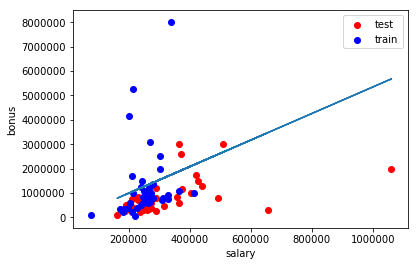

In [163]:
# %load finance_regression.py
#!/usr/bin/python

"""
    Starter code for the regression mini-project.

    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""


import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

### list the features you want to look at--first item in the
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(feature_train, target_train)
print reg.coef_
print reg.intercept_







### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color )
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color )

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()


In [164]:
reg.score(feature_train, target_train)

0.045509192699524359

In [165]:
reg.score(feature_test, target_test)

-1.484992417368511

Change the relationship to bonus and long-term-incentive.

[ 1.19214699]
554478.756215
0.217085971258
-0.59271289995


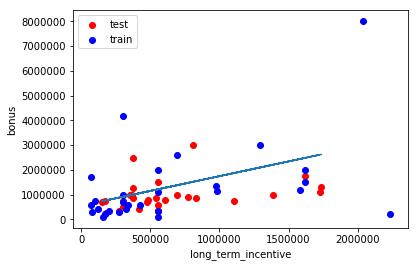

In [4]:
# %load finance_regression.py
#!/usr/bin/python

"""
    Starter code for the regression mini-project.

    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""


import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

### list the features you want to look at--first item in the
### list will be the "target" feature
features_list = ["bonus", "long_term_incentive"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(feature_train, target_train)
print reg.coef_
print reg.intercept_
print reg.score(feature_train, target_train)
print reg.score(feature_test, target_test)




### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color )
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color )

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()


With Outliers:
[ 5.44814029]
-102360.543294
0.0455091926995
-1.48499241737
Without Outliers
[ 2.27410114]
124444.388866
-0.123597985403
0.251488150398


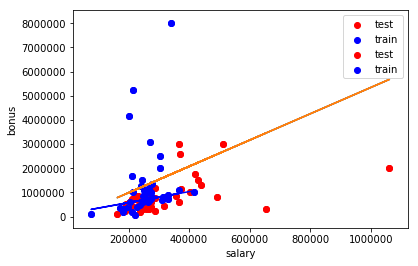

In [10]:
# %load finance_regression.py
#!/usr/bin/python

"""
    Starter code for the regression mini-project.

    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""


import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

### list the features you want to look at--first item in the
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(feature_train, target_train)
print "With Outliers:"
print reg.coef_
print reg.intercept_
print reg.score(feature_train, target_train)
print reg.score(feature_test, target_test)


### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color )
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color )

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass

reg.fit(feature_test, target_test)
print "Without Outliers"
print reg.coef_
print reg.intercept_
print reg.score(feature_train, target_train)
print reg.score(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="b")

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()
